In [1]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

#from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
plt.style.use('fivethirtyeight')
#plt.style.use('seaborn-white')

from sklearn.metrics import auc
from sklearn.metrics import roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import VotingClassifier

In [3]:
train = pd.read_csv('datasource/train.csv')

In [4]:
train = train.fillna((train.median()))

In [5]:
test = pd.read_csv('datasource/test.csv')

In [6]:
test = test.fillna((test.median()))

In [8]:
trained_features = pd.read_csv('datasource/trained_features.csv')

In [10]:
trained_features['FEATURE'].to_list()

['PAYMENT_TO_DEBT_RATIO',
 'DAYS_BIRTH',
 'EXT_SOURCE_SUM',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_ID_PUBLISH',
 'DAYS_REGISTRATION',
 'DAYS_LAST_PHONE_CHANGE',
 'DEBT_TO_PURCHASE_RATIO',
 'DAYS_EMPLOYED',
 'PAYMENT_TO_INCOME_RATIO',
 'DEBT_RATIO',
 'AMT_ANNUITY',
 'EXT_SOURCE_1',
 'REGION_POPULATION_RELATIVE',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'TOTALAREA_MODE',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'HOUR_APPR_PROCESS_START',
 'YEARS_BEGINEXPLUATATION_AVG',
 'LIVINGAREA_AVG',
 'ENTRANCES_AVG',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'NONLIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'APARTMENTS_AVG',
 'CODE_GENDER',
 'APARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLAG_OWN_CAR',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'NAME_FAMILY_STATUS_Married',
 'APARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'NAME_EDUCATION_TYPE_Higher education',
 'REGION_RATING_CLIENT_W_CITY',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_3']

# Training the baseline models

In [11]:
#X = train.drop('TARGET', axis=1)
X = train[['SK_ID_CURR',
'PAYMENT_TO_DEBT_RATIO',
 'DAYS_BIRTH',
 'EXT_SOURCE_SUM',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_ID_PUBLISH',
 'DAYS_REGISTRATION',
 'DAYS_LAST_PHONE_CHANGE',
 'DEBT_TO_PURCHASE_RATIO',
 'DAYS_EMPLOYED',
 'PAYMENT_TO_INCOME_RATIO',
 'DEBT_RATIO',
 'AMT_ANNUITY',
 'EXT_SOURCE_1',
 'REGION_POPULATION_RELATIVE',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'TOTALAREA_MODE',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'HOUR_APPR_PROCESS_START',
 'YEARS_BEGINEXPLUATATION_AVG',
 'LIVINGAREA_AVG',
 'ENTRANCES_AVG',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'NONLIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'APARTMENTS_AVG',
 'CODE_GENDER',
 'APARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLAG_OWN_CAR',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'NAME_FAMILY_STATUS_Married',
 'APARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'NAME_EDUCATION_TYPE_Higher education',
 'REGION_RATING_CLIENT_W_CITY',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_3']]

y = train.TARGET

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [12]:
# LOGISTIC REGERSSION - logreg_mod

losgistic_regression = LogisticRegression(penalty='l1',
                               dual=False,
                               tol=0.0001,
                               C=1.0, fit_intercept=True,
                               intercept_scaling=1, class_weight=None,
                               random_state=None, solver='liblinear',
                               max_iter=100,
                               multi_class='ovr', verbose=2)

losgistic_regression.fit(X_train,y_train)

[LibLinear]

LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear',
                   verbose=2)

In [13]:
# ADABOOST -ada_mod

adaboost = AdaBoostClassifier(base_estimator = None,
                            n_estimators=200,
                            learning_rate=0.001)

adaboost.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.001, n_estimators=200)

In [14]:
# GRADIENTBOOSTING - gb_mod

gradientboost = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,
                                   n_estimators=200,
                                   subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1,
                                   min_weight_fraction_leaf=0.0,
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

gradientboost.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=200)

In [15]:
# Mean Accuracy score

# logistic
print(losgistic_regression.score(X_test, y_test))

# adaboost
print(adaboost.score(X_test, y_test))

# gradient boost
print(gradientboost.score(X_test, y_test))

0.9204063581258618
0.9204193657483285
0.9209136554020656


In [16]:
test_labels = losgistic_regression.predict_proba(np.array(X_test.values))[:,1]

print(roc_auc_score(y_test, test_labels, average='macro', sample_weight=None))

0.7257919735128122


In [17]:
test_labels = adaboost.predict_proba(np.array(X_test.values))[:,1]

print(roc_auc_score(y_test, test_labels, average='macro', sample_weight=None))

0.6438473574903661


In [18]:
test_labels = gradientboost.predict_proba(np.array(X_test.values))[:,1]
print(roc_auc_score(y_test, test_labels, average='macro', sample_weight=None))

0.7638025257370082


# Hyperparameter Tuning for Gradient Boosting & Logistic Regression models as they return better cv score

In [21]:
# Set params for gradientbosst

gb_parameters = {'loss': ['deviance', 'exponential'],
                'n_estimators': randint(10, 50),
                'max_depth': randint(1, 5)}

In [22]:
gb_gridSearch = RandomizedSearchCV(estimator=gradientboost, param_distributions=gb_parameters,
                               n_iter=10, scoring='roc_auc',
                               cv=None,
                               verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] loss=deviance, max_depth=1, n_estimators=45 .....................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] ...... loss=deviance, max_depth=1, n_estimators=45, total=  43.1s
[CV] loss=deviance, max_depth=1, n_estimators=45 .....................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.1s remaining:    0.0s
[CV] ...... loss=deviance, max_depth=1, n_estimators=45, total=  42.8s
[CV] loss=deviance, max_depth=1, n_estimators=45 .....................
[CV] ...... loss=deviance, max_depth=1, n_estimators=45, total=  45.0s
[CV] loss=deviance, max_depth=1, n_estimators=45 .....................
[CV] ...... loss=deviance, max_depth=1, n_estimators=45, total=  54.3s
[CV] loss=deviance, max_depth=1, n_estimators=45 .....................
[CV] ...... loss=deviance, max_depth=1, n_estimators=45, total= 1.0min
[CV] loss=exponential, max_depth=1, n_estimators=17 ................

In [23]:
gb_gridSearch.best_params_, gb_gridSearch.best_score_

({'loss': 'exponential', 'max_depth': 4, 'n_estimators': 49},
 0.7504640400474295)

In [24]:
# Set params for Logistic regression

lg_parameters = {'C': randint(10, 50),
                     'penalty': ['l1']}

In [25]:
lg_gridSearch = RandomizedSearchCV(losgistic_regression, param_distributions=lg_parameters, scoring='roc_auc',
                                       n_iter=5, cv=3).fit(X_train, y_train)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

In [26]:
lg_gridSearch.best_params_, lg_gridSearch.best_score_

({'C': 36, 'penalty': 'l1'}, 0.7229727663385924)

# Applying trained Hyperparams to predict

In [27]:
fitted_gb_model = gb_gridSearch.best_estimator_.fit(X_train, y_train)
test_labels = fitted_gb_model.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test, test_labels, average='macro', sample_weight=None)

0.7551947521709378

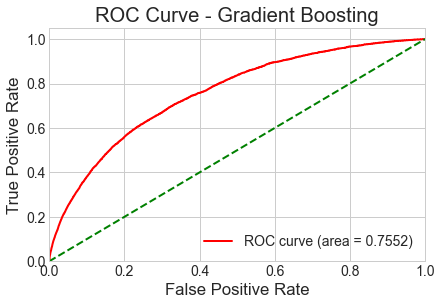

In [28]:
# AUC plotting

plt.style.use('seaborn-whitegrid')
fpr, tpr, thresholds = roc_curve(y_test, test_labels)

roc_auc = auc(fpr, tpr)
plt.figure()
lw=2
plt.plot(fpr, tpr, color='r', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='g', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.show()

In [29]:
fitted_lg_model = lg_gridSearch.best_estimator_.fit(X_train, y_train)
test_labels = fitted_lg_model.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test, test_labels, average='macro', sample_weight=None)

[LibLinear]

0.7257665016869108

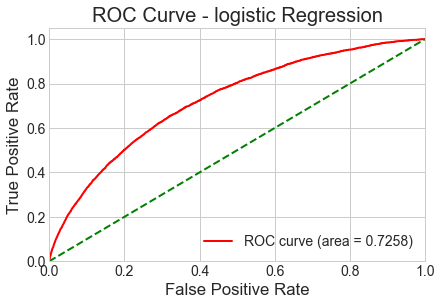

In [30]:
# AUC plotting

fpr, tpr, thresholds = roc_curve(y_test, test_labels)

roc_auc = auc(fpr, tpr)
plt.figure()
lw=2
plt.plot(fpr, tpr, color='r', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='g', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Ensembling two models

In [31]:
voted_model = VotingClassifier(estimators=[('gb', fitted_gb_model),
                             ('logistic', fitted_lg_model)],
                            voting='soft', weights=[2,1])
fitting_voted_model = voted_model.fit(X_train, y_train)

[LibLinear]

In [32]:
test_labels = fitting_voted_model.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test, test_labels, average='macro', sample_weight=None)

0.7511081225996148

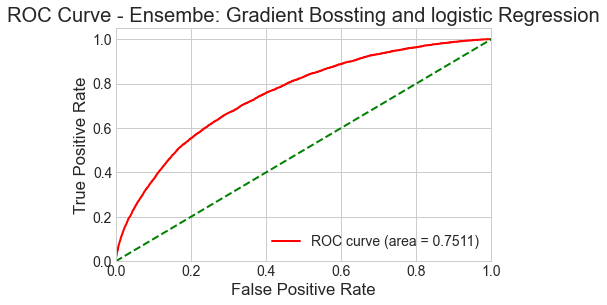

In [33]:
# AUC plotting

fpr, tpr, thresholds = roc_curve(y_test, test_labels)

roc_auc = auc(fpr, tpr)
plt.figure()
lw=2
plt.plot(fpr, tpr, color='r', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='g', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Ensembe: Gradient Bossting and logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Applying trained (ensemble) models on test dataset

In [34]:
test.head()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,AMT_GOODS_PRICE_log,CNT_FAM_MEMBERS_log,DAYS_REGISTRATION_scaled,DEBT_RATIO,PAYMENT_TO_INCOME_RATIO,PAYMENT_TO_DEBT_RATIO,DEBT_TO_PAYMENT_RATIO,DEBT_TO_PURCHASE_RATIO,EXT_SOURCE_SUM,EXT_SOURCE_MEAN
0,100001,0,0,0,0.0,135000.0,568800.0,20560.5,450000.0,0.018850,...,13.017003,0.693147,0.782059,4.213333,0.152300,0.036147,27.664697,1.2640,1.701788,0.567263
1,100005,1,0,0,0.0,99000.0,222768.0,17370.0,180000.0,0.035792,...,12.100712,0.693147,0.615631,2.250182,0.175455,0.077973,12.824870,1.2376,1.289607,0.429869
2,100013,1,1,0,0.0,202500.0,663264.0,69777.0,630000.0,0.019101,...,13.353475,0.693147,0.908313,3.275378,0.344578,0.105202,9.505482,1.0528,1.551621,0.655389
3,100028,0,0,0,2.0,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,14.269766,1.386294,0.915690,5.000000,0.155614,0.031123,32.130726,1.0000,1.648115,0.549372
4,100038,1,1,1,1.0,180000.0,625500.0,32067.0,625500.0,0.010032,...,13.346307,1.098612,0.831380,3.475000,0.178150,0.051266,19.506034,1.0000,1.551621,0.313916


In [35]:
test = test[['SK_ID_CURR',
'PAYMENT_TO_DEBT_RATIO',
 'DAYS_BIRTH',
 'EXT_SOURCE_SUM',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_ID_PUBLISH',
 'DAYS_REGISTRATION',
 'DAYS_LAST_PHONE_CHANGE',
 'DEBT_TO_PURCHASE_RATIO',
 'DAYS_EMPLOYED',
 'PAYMENT_TO_INCOME_RATIO',
 'DEBT_RATIO',
 'AMT_ANNUITY',
 'EXT_SOURCE_1',
 'REGION_POPULATION_RELATIVE',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'TOTALAREA_MODE',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'HOUR_APPR_PROCESS_START',
 'YEARS_BEGINEXPLUATATION_AVG',
 'LIVINGAREA_AVG',
 'ENTRANCES_AVG',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'NONLIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'APARTMENTS_AVG',
 'CODE_GENDER',
 'APARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLAG_OWN_CAR',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'NAME_FAMILY_STATUS_Married',
 'APARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'NAME_EDUCATION_TYPE_Higher education',
 'REGION_RATING_CLIENT_W_CITY',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_3']]

In [49]:
predictions = fitting_voted_model.predict_proba(test)[:,1]
out = {'SK_ID_CURR': test.SK_ID_CURR, 
                 'TARGET': predictions}
output = pd.DataFrame(out)
output.head(15)

,SK_ID_CURR,TARGET
0,100001,0.041923
1,100005,0.074231
2,100013,0.015277
3,100028,0.043955
4,100038,0.050533
5,100042,0.047409
6,100057,0.024463
7,100065,0.039030
8,100066,0.033619
9,100067,0.084224
